In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

from sklearn.svm import SVC, SVR

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df= pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df['Gender'].value_counts().to_dict()

{'Female': 204, 'Male': 196}

In [5]:
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

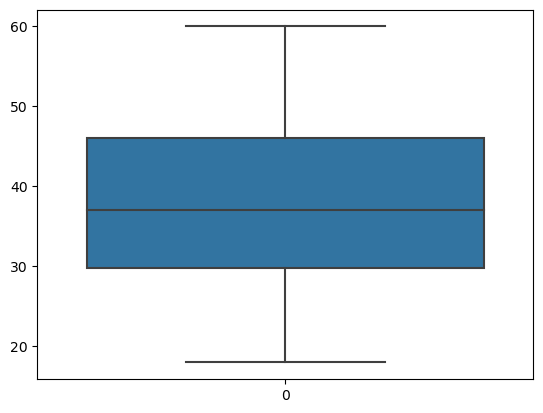

In [8]:
sns.boxplot(df['Age'])

<Axes: >

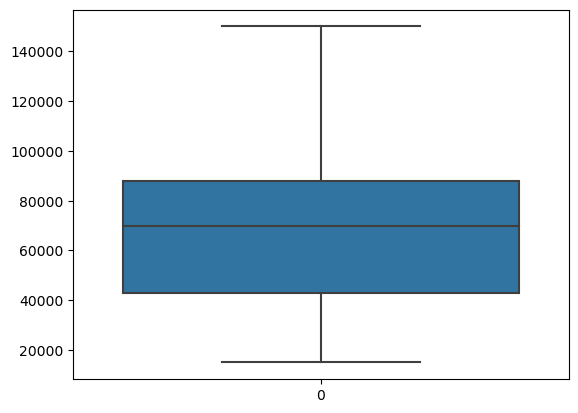

In [9]:
sns.boxplot(df['EstimatedSalary'])

In [10]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

# scaling  by StandardScaler

In [11]:
x=df.drop(['Purchased', 'User ID'], axis=1)
y=df['Purchased']

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state= 42, test_size=0.20, stratify=y)

In [13]:
std_scaler= StandardScaler()
x_train_scal= std_scaler.fit_transform(x_train)
x_test_scal= std_scaler.transform(x_test)

In [14]:
x_train_scal

array([[ 1.08483674, -1.23446186, -0.367992  ],
       [-0.92179769, -0.57764605, -1.05831408],
       [-0.92179769,  0.07916976,  0.26480323],
       [-0.92179769,  1.95578636, -1.3747117 ],
       [-0.92179769,  0.36066225, -0.31046516],
       [ 1.08483674,  0.17300059,  0.17851297],
       [ 1.08483674,  2.14344802,  0.35109349],
       [ 1.08483674,  0.45449308, -0.48304568],
       [-0.92179769, -0.01466107,  0.20727639],
       [ 1.08483674, -0.01466107,  0.17851297],
       [-0.92179769, -0.85913854, -0.33922858],
       [-0.92179769, -1.60978518, -1.3747117 ],
       [-0.92179769, -1.23446186,  0.52367401],
       [-0.92179769, -0.85913854, -0.77067988],
       [-0.92179769,  0.8298164 , -0.85697014],
       [-0.92179769,  1.01747806, -1.20213118],
       [ 1.08483674,  0.17300059,  1.01265215],
       [ 1.08483674, -0.48381522,  1.41534003],
       [ 1.08483674, -0.29615356,  1.18523267],
       [-0.92179769,  0.17300059,  0.00593246],
       [-0.92179769,  1.11130889, -0.914

In [15]:
x_test_scal

array([[-0.92179769,  1.01747806,  1.38657661],
       [ 1.08483674, -1.0468002 , -1.60481906],
       [ 1.08483674, -0.20232273, -1.46100196],
       [-0.92179769,  0.07916976,  1.18523267],
       [-0.92179769, -1.60978518,  0.32233007],
       [ 1.08483674,  1.58046304, -0.02283096],
       [-0.92179769,  0.26683142,  0.12098613],
       [ 1.08483674,  2.14344802,  0.89759847],
       [-0.92179769,  2.04961719,  0.35109349],
       [ 1.08483674, -0.1084919 , -1.0870775 ],
       [ 1.08483674,  0.26683142, -0.39675542],
       [ 1.08483674,  0.92364723,  0.98388873],
       [ 1.08483674,  0.92364723, -1.31718486],
       [ 1.08483674,  0.73598557,  0.23603981],
       [ 1.08483674, -0.85913854,  1.50163029],
       [ 1.08483674, -0.20232273, -0.59809936],
       [ 1.08483674, -0.57764605,  0.14974955],
       [-0.92179769,  0.8298164 , -1.40347512],
       [ 1.08483674,  0.36066225, -0.54057252],
       [ 1.08483674,  1.7681247 ,  1.78926449],
       [ 1.08483674, -0.95296937,  0.552

In [16]:
x_test

,Gender,Age,EstimatedSalary
331,0,48,119000
92,1,26,15000
1,1,35,20000
234,0,38,112000
136,0,20,82000
...,...,...,...
393,1,60,42000
151,1,41,45000
126,1,42,65000
265,0,42,108000


# modeling

In [17]:
model=SVC()
model.fit(x_train_scal, y_train)

SVC()

In [18]:
model.score(x_train_scal, y_train)

0.909375

In [19]:
model.score(x_test_scal, y_test)

0.9125

In [20]:
### Training Data Evaluation 
y_pred = model.predict(x_train_scal)

acc = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {acc}")

cnf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix = \n{cnf_matrix}")

clf = classification_report(y_train,y_pred)
print(f"Classification Report = \n {clf}")

Accuracy Score = 0.909375
Confusion Matrix = 
[[189  17]
 [ 12 102]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       206
           1       0.86      0.89      0.88       114

    accuracy                           0.91       320
   macro avg       0.90      0.91      0.90       320
weighted avg       0.91      0.91      0.91       320



In [21]:
### Testing Data Evaluation 
y_pred = model.predict(x_test_scal)

acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {acc}")

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix = \n{cnf_matrix}")

clf = classification_report(y_test,y_pred)
print(f"Classification Report = \n {clf}")

Accuracy Score = 0.9125
Confusion Matrix = 
[[46  5]
 [ 2 27]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.84      0.93      0.89        29

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



# hyper parameter

In [22]:
model=SVC()
hyper={ 'C':np.arange(1,10),
      'kernel':['linear', 'poly', 'rbf', 'sigmoid']}  # C>  Regulozation parameter > penalty added
rscv=RandomizedSearchCV(model, hyper, cv=5)
rscv.fit(x_train_scal, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [23]:
### Training Data Evaluation 
y_pred = rscv.predict(x_train_scal)

acc = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {acc}")

cnf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix = \n{cnf_matrix}")

clf = classification_report(y_train,y_pred)
print(f"Classification Report = \n {clf}")

Accuracy Score = 0.9125
Confusion Matrix = 
[[189  17]
 [ 11 103]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       206
           1       0.86      0.90      0.88       114

    accuracy                           0.91       320
   macro avg       0.90      0.91      0.91       320
weighted avg       0.91      0.91      0.91       320



In [24]:
### Testing Data Evaluation 
y_pred = rscv.predict(x_test_scal)

acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {acc}")

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix = \n{cnf_matrix}")

clf = classification_report(y_test,y_pred)
print(f"Classification Report = \n {clf}")

Accuracy Score = 0.9
Confusion Matrix = 
[[46  5]
 [ 3 26]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



# scaling by Normalization

In [25]:
nor_scaler=MaxAbsScaler()
x_train_nor=nor_scaler.fit_transform(x_train)
x_test_nor= nor_scaler.transform(x_test)

In [26]:
model_svm=SVC()
model_svm.fit(x_train_nor, y_train)

SVC()

In [27]:
model_svm.score(x_train_nor, y_train)

0.90625

In [28]:
model_svm.score(x_test_nor, y_test)

0.875

In [29]:
### Training Data Evaluation 
y_pred = model_svm.predict(x_train_nor)

acc = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {acc}")

cnf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix = \n{cnf_matrix}")

clf = classification_report(y_train,y_pred)
print(f"Classification Report = \n {clf}")

Accuracy Score = 0.90625
Confusion Matrix = 
[[191  15]
 [ 15  99]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       206
           1       0.87      0.87      0.87       114

    accuracy                           0.91       320
   macro avg       0.90      0.90      0.90       320
weighted avg       0.91      0.91      0.91       320



In [30]:
### Testing Data Evaluation 
y_pred = model_svm.predict(x_test_nor)

acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {acc}")

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix = \n{cnf_matrix}")

clf = classification_report(y_test,y_pred)
print(f"Classification Report = \n {clf}")

Accuracy Score = 0.875
Confusion Matrix = 
[[46  5]
 [ 5 24]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        51
           1       0.83      0.83      0.83        29

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80



#  hyper parameter

In [31]:
model_svm=SVC()
hyper={ 'C':np.arange(1,10),
      'kernel':['linear', 'poly', 'rbf', 'sigmoid']}  # C>  Regulozation parameter > penalty added
rscv=RandomizedSearchCV(model_svm, hyper, cv=5)
rscv.fit(x_train_nor, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [32]:
rscv.best_estimator_

SVC(C=4)

In [33]:
rscv.best_params_

{'kernel': 'rbf', 'C': 4}

In [34]:
rscv.score(x_train_nor, y_train)

0.915625

In [35]:
### Training Data Evaluation 
y_pred = rscv.predict(x_train_nor)

acc = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {acc}")

cnf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix = \n{cnf_matrix}")

clf = classification_report(y_train,y_pred)
print(f"Classification Report = \n {clf}")

Accuracy Score = 0.915625
Confusion Matrix = 
[[190  16]
 [ 11 103]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       206
           1       0.87      0.90      0.88       114

    accuracy                           0.92       320
   macro avg       0.91      0.91      0.91       320
weighted avg       0.92      0.92      0.92       320



In [36]:
rscv.score(x_test_nor, y_test)

0.9

In [37]:
### Testing Data Evaluation 
y_pred = rscv.predict(x_test_nor)

acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {acc}")

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix = \n{cnf_matrix}")

clf = classification_report(y_test,y_pred)
print(f"Classification Report = \n {clf}")

Accuracy Score = 0.9
Confusion Matrix = 
[[46  5]
 [ 3 26]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80

